In [2]:
from google.colab import files
uploaded=files.upload()

Saving Lab Session Data.xlsx to Lab Session Data.xlsx


In [ ]:
#1
import pandas as pd
import numpy as np
data1=pd.read_excel('Lab Session Data.xlsx', sheet_name='Purchase data', usecols="B,C,D")
A=data1.to_numpy()


data2=pd.read_excel('Lab Session Data.xlsx', sheet_name='Purchase data', usecols="E")
print(data2)
C=data2.to_numpy()


print("Matrix A:")
print(A)
print("Matrix C:")
print(C)

dimensionality=A.shape[1]
print("Dimensionality of A:", dimensionality)

vector_num=A.shape[0]
print("Number of vectors in A:", vector_num)

try:
    rank_A = np.linalg.matrix_rank(A)
    print("Rank of A:", rank_A)
except Exception as e:
    print("Error calculating rank:", e)

AInv=np.linalg.pinv(A)
print("PInverse of A:")
print(AInv)

#2
X=np.dot(AInv,C)
print("Solution X:")
print(X)

#3
data2['Category']=np.where(data2['Payment (Rs)']>200, 'RICH', 'POOR')
y = data2['Category'].values
print(y)

   Payment (Rs)
0           386
1           289
2           393
3           110
4           280
5           167
6           271
7           274
8           148
9           198
Matrix A:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Matrix C:
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Dimensionality of A: 3
Number of vectors in A: 10
Rank of A: 3
PInverse of A:
[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]
Solution X:
[[ 1.]
 [55.]
 [18.]]
['RICH' 'RICH' 'RICH' 'POOR' 'RICH' 'POOR' 'RICH' 'RICH' 'POOR' 'POOR']


Sample Mean of Prices on Wednesdays: 1550.706
Mean Price: 1560.663453815261
Variance of Price: 58732.365352539186
Sample Mean of Prices on April: 1698.9526315789474
Probability of loss on Wednesdays: 0.4979919678714859
Probability of profit on Wednesdays: 0.08433734939759036
Probability of profit given Wednesdays: 0.42


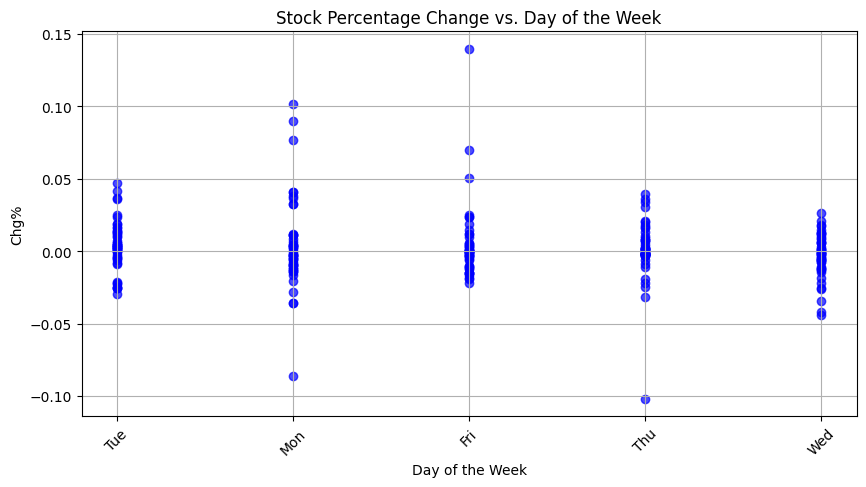

In [ ]:
#4
import pandas as pd
import statistics
import matplotlib.pyplot as plt

data3 = pd.read_excel('Lab Session Data.xlsx', sheet_name='IRCTC Stock Price', usecols=["Day", "Price", "Month", "Chg%"])

wednesday_prices = data3[data3["Day"] == "Wed"]["Price"].dropna()
wednesday_chg = data3[data3["Day"] == "Wed"]["Chg%"].dropna()
sample_mean_wednesday = statistics.mean(wednesday_prices.tolist())

price_list = data3["Price"].dropna().tolist()
mean_price = statistics.mean(price_list)
variance_price = statistics.variance(price_list)

print("Sample Mean of Prices on Wednesdays:", sample_mean_wednesday)
print("Mean Price:", mean_price)
print("Variance of Price:", variance_price)

April_prices=data3[data3["Month"]=="Apr"]["Price"].dropna()
sample_mean_April = statistics.mean(April_prices.tolist())
print("Sample Mean of Prices on April:", sample_mean_April)

loss_prob = (data3["Chg%"].apply(lambda x: x < 0).sum()) / len(data3)
profit_on_wednesday_prob = (wednesday_chg > 0).sum() / len(data3)
print("Probability of loss on Wednesdays:", loss_prob)
print("Probability of profit on Wednesdays:", profit_on_wednesday_prob)

profit_given_wednesday = (wednesday_chg > 0).sum() / len(wednesday_chg)
print("Probability of profit given Wednesdays:", profit_given_wednesday)

plt.figure(figsize=(10, 5))
plt.scatter(data3["Day"], data3["Chg%"], alpha=0.7, color="blue")
plt.xlabel("Day of the Week")
plt.ylabel("Chg%")
plt.title("Stock Percentage Change vs. Day of the Week")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Missing Values in Each Column:
sex     307
TSH     842
T3     2604
TT4     442
T4U     809
FTI     802
TBG    8823
dtype: int64

Numeric Data Range:
         TSH     T3    TT4   T4U    FTI    TBG
min    0.005   0.05    2.0  0.17    1.4    0.1
max  530.000  18.00  600.0  2.33  881.0  200.0

Mean and Standard Deviation:
            TSH        T3         TT4       T4U         FTI        TBG
mean   5.218403  1.970629  108.700305  0.976056  113.640746  29.870057
std   24.184006  0.887579   37.522670  0.200360   41.551650  21.080504

Outliers Count:
TSH    884
T3     360
TT4    422
T4U    420
FTI    501
TBG     29
dtype: int64

Data Processing Completed Successfully!
None
None
None
None
None
None
None
None
Missing values handled successfully!
Data normalization/scaling completed successfully!


<ipython-input-17-2da77d12ff36>:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"f": 0, "t": 1})
<ipython-input-17-2da77d12ff36>:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(df[col].fillna(df[col].median(), inplace=True))
<ipython-input-17-2da7

Jaccard Coefficient: nan
Simple Matching Coefficient: nan
Cosine Similarity: 0.012497646996349044


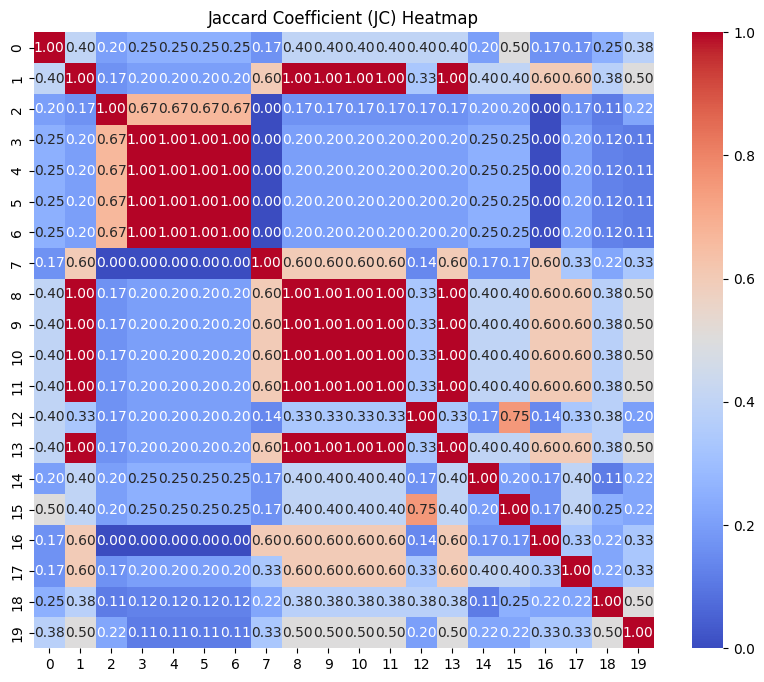

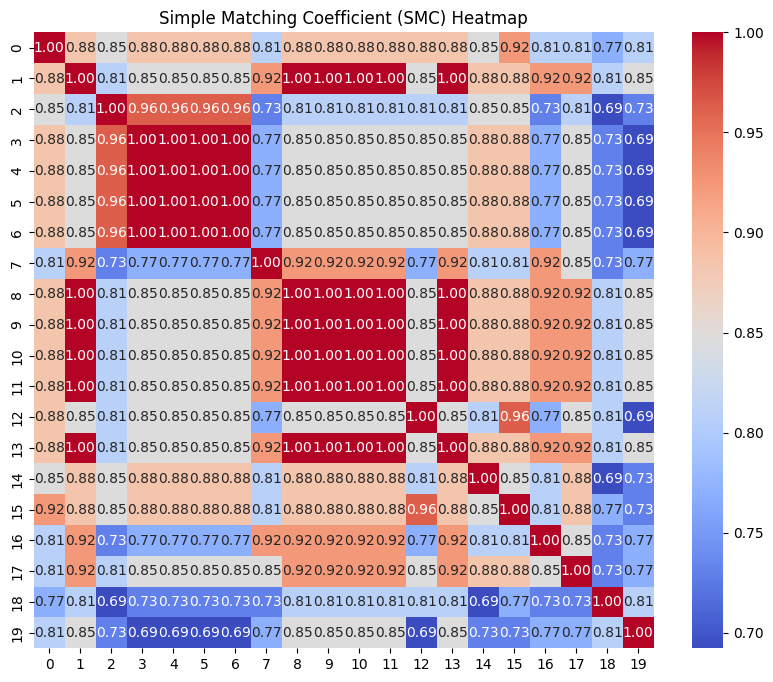

In [ ]:
#5
import pandas as pd
import numpy as np
df = pd.read_excel('Lab Session Data.xlsx', sheet_name="thyroid0387_UCI")

df.replace("?", pd.NA, inplace=True)

numeric_cols = ["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

print("\nNumeric Data Range:")
print(df[numeric_cols].agg(["min", "max"]))

print("\nMean and Standard Deviation:")
print(df[numeric_cols].agg(["mean", "std"]))

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

print("\nOutliers Count:")
print(outliers)

binary_cols = [
    "on thyroxine", "query on thyroxine", "on antithyroid medication", "sick",
    "pregnant", "thyroid surgery", "I131 treatment", "query hypothyroid",
    "query hyperthyroid", "lithium", "goitre", "tumor", "hypopituitary", "psych",
    "TSH measured", "T3 measured", "TT4 measured", "T4U measured", "FTI measured", "TBG measured"
]

df[binary_cols] = df[binary_cols].replace({"f": 0, "t": 1})

df["sex"] = df["sex"].replace({"F": 0, "M": 1})

df = pd.get_dummies(df, columns=["referral source"], drop_first=True)

print("\nData Processing Completed Successfully!")

#6
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#6
numeric_cols = ["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

for col in numeric_cols:
    if outliers[col] > 0:
        print(df[col].fillna(df[col].median(), inplace=True))
    else:
        print(df[col].fillna(df[col].mean(), inplace=True))


categorical_cols = ["sex", "Condition"]
for col in categorical_cols:
    print(df[col].fillna(df[col].mode()[0], inplace=True))

print("Missing values handled successfully!")

#7

columns_to_normalize = ["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]

scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


print("Data normalization/scaling completed successfully!")

#8
from sklearn.metrics.pairwise import cosine_similarity

file_path = "Lab Session Data.xlsx"
df_thyroid = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

vector_1 = df_thyroid.iloc[0]
vector_2 = df_thyroid.iloc[1]

binary_columns = [col for col in df_thyroid.columns if df_thyroid[col].dropna().isin([0, 1]).all()]
binary_vector_1 = vector_1[binary_columns]
binary_vector_2 = vector_2[binary_columns]

f11 = np.sum((binary_vector_1 == 1) & (binary_vector_2 == 1))  # Both 1
f00 = np.sum((binary_vector_1 == 0) & (binary_vector_2 == 0))  # Both 0
f01 = np.sum((binary_vector_1 == 0) & (binary_vector_2 == 1))  # First 0, Second 1
f10 = np.sum((binary_vector_1 == 1) & (binary_vector_2 == 0))  # First 1, Second 0

jc = f11 / (f10 + f01 + f11)

smc = (f11 + f00) / (f00 + f01 + f10 + f11)

print("Jaccard Coefficient:", jc)
print("Simple Matching Coefficient:", smc)

full_vector_1 = np.array(vector_1[numeric_cols].replace('?', np.nan).fillna(0).astype(np.float64)).reshape(1, -1)
full_vector_2 = np.array(vector_2[numeric_cols].replace('?', np.nan).fillna(0).astype(np.float64)).reshape(1, -1)

# Compute Cosine Similarity
cos_sim = cosine_similarity(full_vector_1, full_vector_2)[0][0]

print("Cosine Similarity:", cos_sim)

#10
import seaborn as sns
import matplotlib.pyplot as plt

df_20 = df.iloc[:20]
binary_columns = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]
df_binary = df[binary_columns]
def calculate_jc_smc(vec1, vec2):
    f11 = np.sum((vec1 == 1) & (vec2 == 1))
    f00 = np.sum((vec1 == 0) & (vec2 == 0))
    f01 = np.sum((vec1 == 0) & (vec2 == 1))
    f10 = np.sum((vec1 == 1) & (vec2 == 0))

    jc = f11 / (f10 + f01 + f11) if (f10 + f01 + f11) != 0 else 0
    smc = (f11 + f00) / (f00 + f01 + f10 + f11)

    return jc, smc
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))

# Compute similarity for each pair of vectors
for i in range(20):
    for j in range(20):
        jc, smc = calculate_jc_smc(df_binary.iloc[i], df_binary.iloc[j])
        jc_matrix[i, j] = jc
        smc_matrix[i, j] = smc
# Convert the first 20 full observation vectors into a NumPy array
numeric_columns = ["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]
df_full_vectors = df[numeric_columns].to_numpy(dtype=np.float64)  # Convert to NumPy array

cos_matrix = cosine_similarity(df_full_vectors)

# Function to plot heatmaps
def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(title)
    plt.show()

# Plot JC, SMC, and Cosine Similarity heatmaps
plot_heatmap(jc_matrix, "Jaccard Coefficient (JC) Heatmap")
plot_heatmap(smc_matrix, "Simple Matching Coefficient (SMC) Heatmap")
plot_heatmap(cos_matrix, "Cosine Similarity Heatmap")